In [ ]:
# !pip install pycaret==3.0.4
# !pip install shap
# ! pip install autoviz

In [5]:
import pandas as pd
# import numpy as np
# import pycaret
# import matplotlib
from pycaret.regression import *
pd.set_option('display.max_columns', 100)

In [17]:
filename = "./data.csv"
df = pd.read_csv(filename)
label_mapping = {'Yes': 1, 'No': 0}
# 'Label'列をマップして変換
purpose = "Attrition"
df[purpose] = df[purpose].map(label_mapping)

purpose = "MonthlyAchievement"
df = df.dropna(subset=[purpose])

exp = setup(data = df, target = purpose)

In [7]:
df[:1]

Age  Attrition BusinessTravel  DailyAchievement              Department  \
0   25          0  Travel_Rarely              1280  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 7          1        Medical              1             143   

   EnvironmentSatisfaction Gender  HourlyAchievement  JobInvolvement  \
0                        4   Male                 64               2   

   JobLevel             JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0         1  Research Scientist                4       Married           2889   

   MonthlyAchievement  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0               26897                   1      Y       No                  5   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  1                         3             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 2                  2                      2   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager HowToEmploy  Incentive  \
0                        2                     1      intern          0   

   RemoteWork  
0           4

In [18]:
best = compare_models()


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [19]:
best

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1974, verbose=0,
                      warm_start=False)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


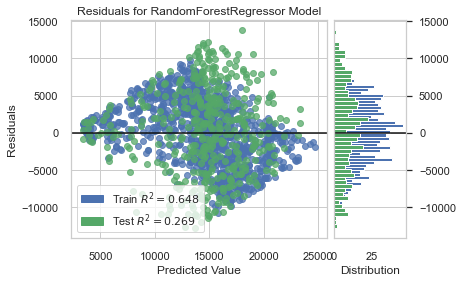

In [20]:
model = create_model(best)
tuned_model = tune_model(model)
plot_model(tuned_model)

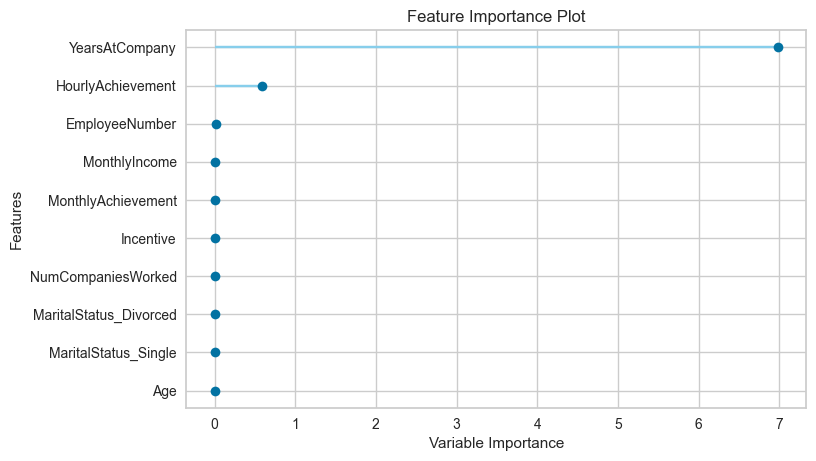

In [12]:
plot_model(tuned_model, plot='feature')

Shape of your Data Set loaded: (1470, 38)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing upto 30 columns (max) in each category:
    Numeric Columns : []
    Integer-Categorical Columns: ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyAchievement', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyAchievement', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Incentive', 'RemoteWork']
    String-Categorical Columns: ['BusinessTravel', 'Department', 'EducationF

Number of All Scatter Plots = 190
All Plots are saved in .\AutoViz_Plots\DailyAchievement
Time to run AutoViz = 57 seconds 


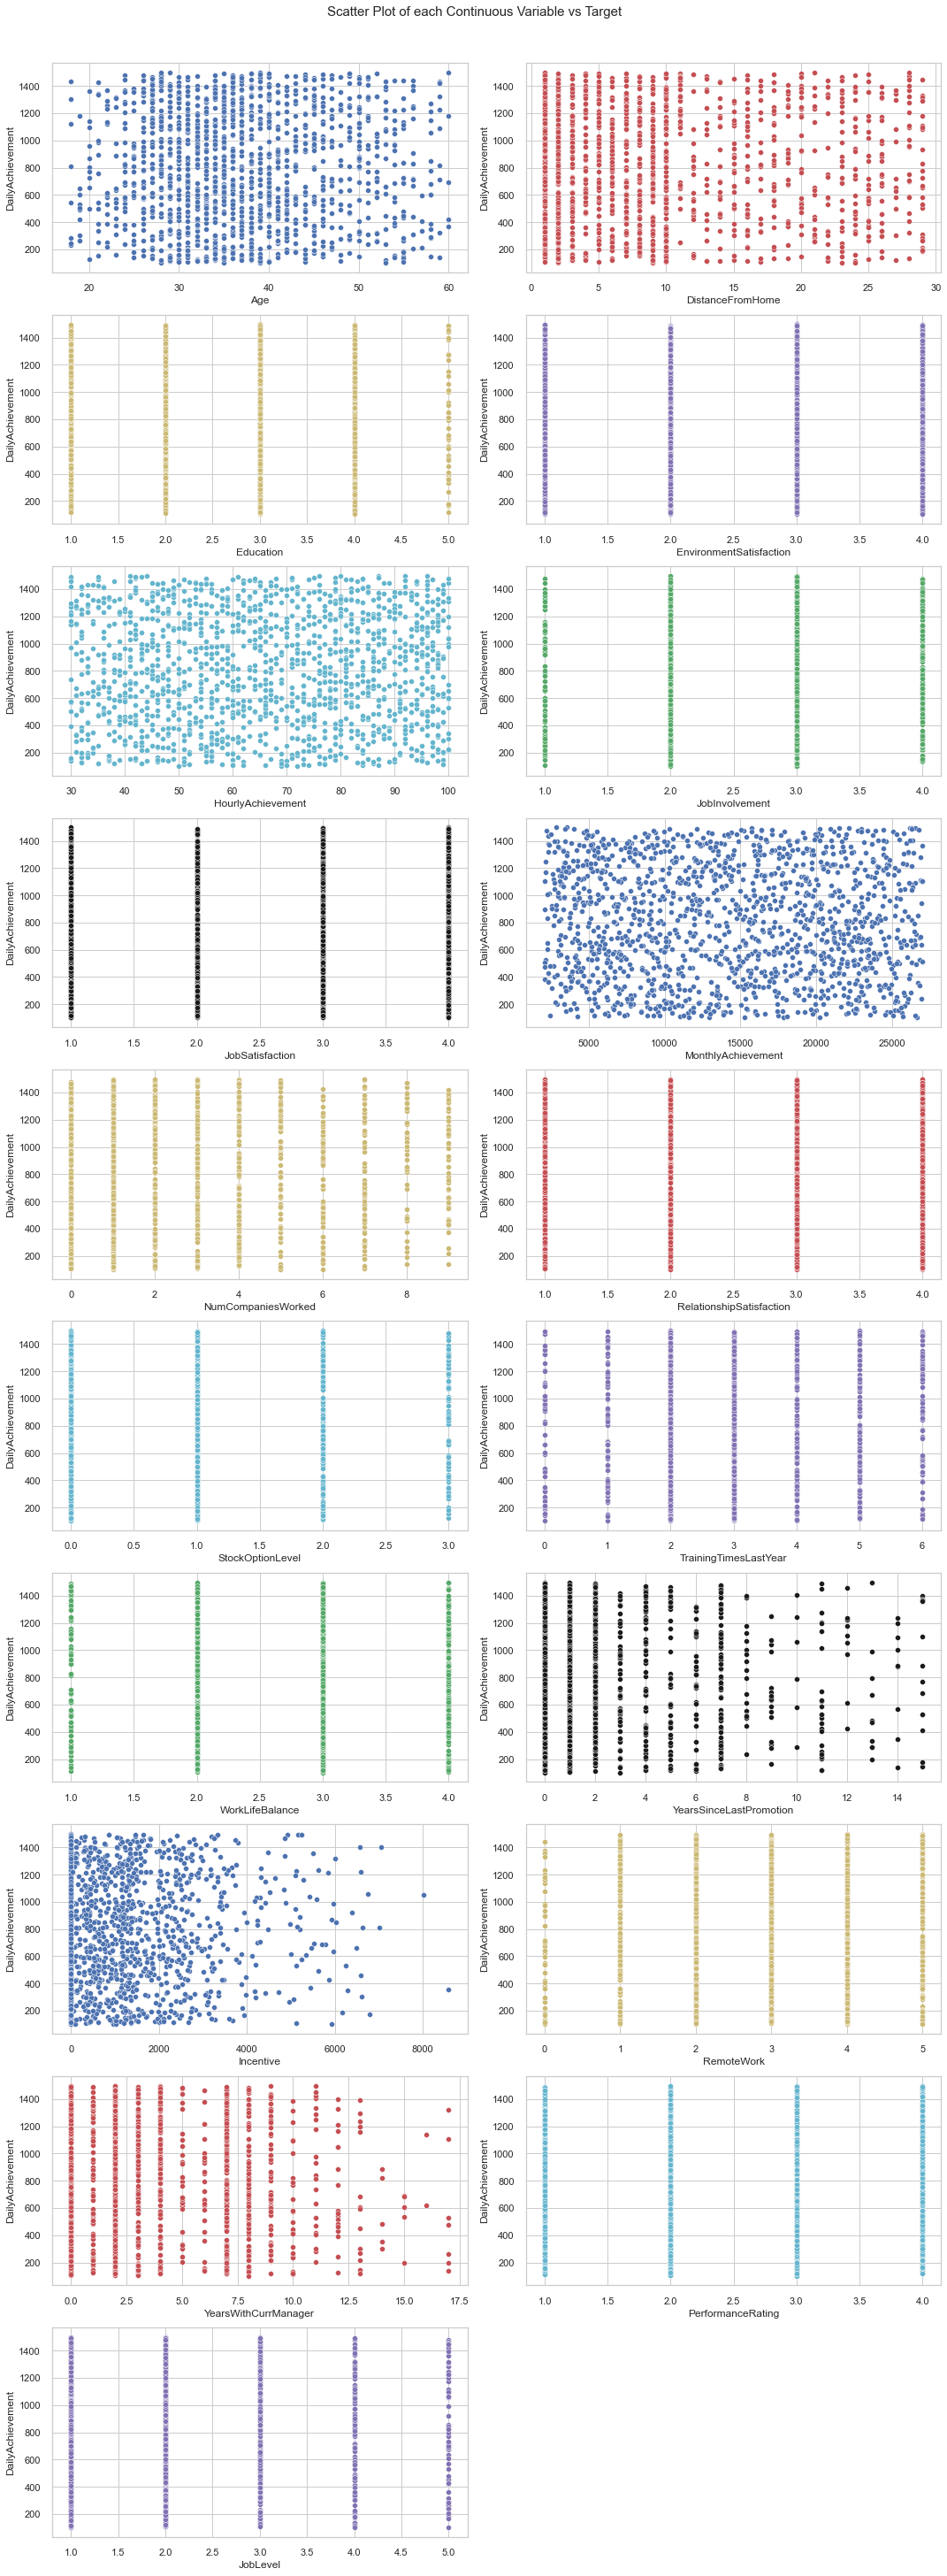

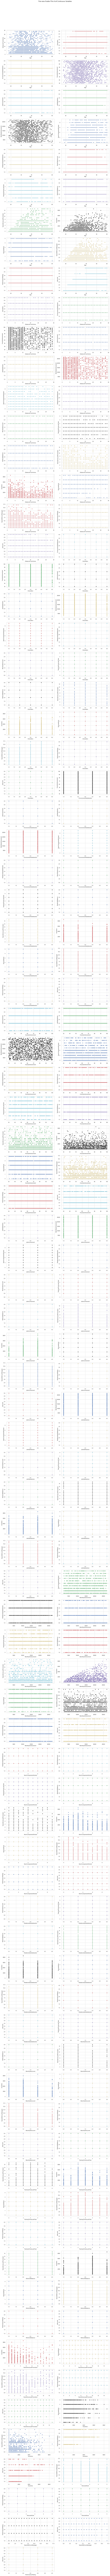

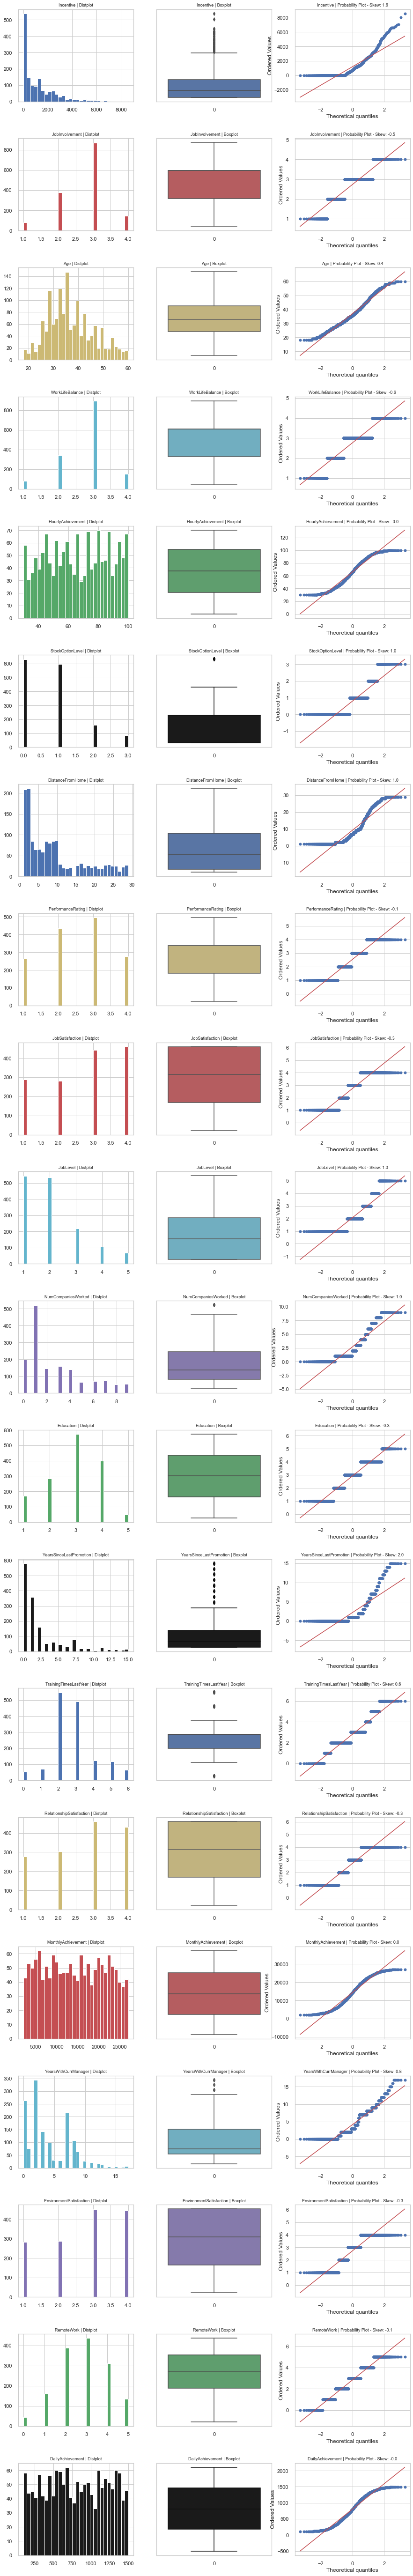

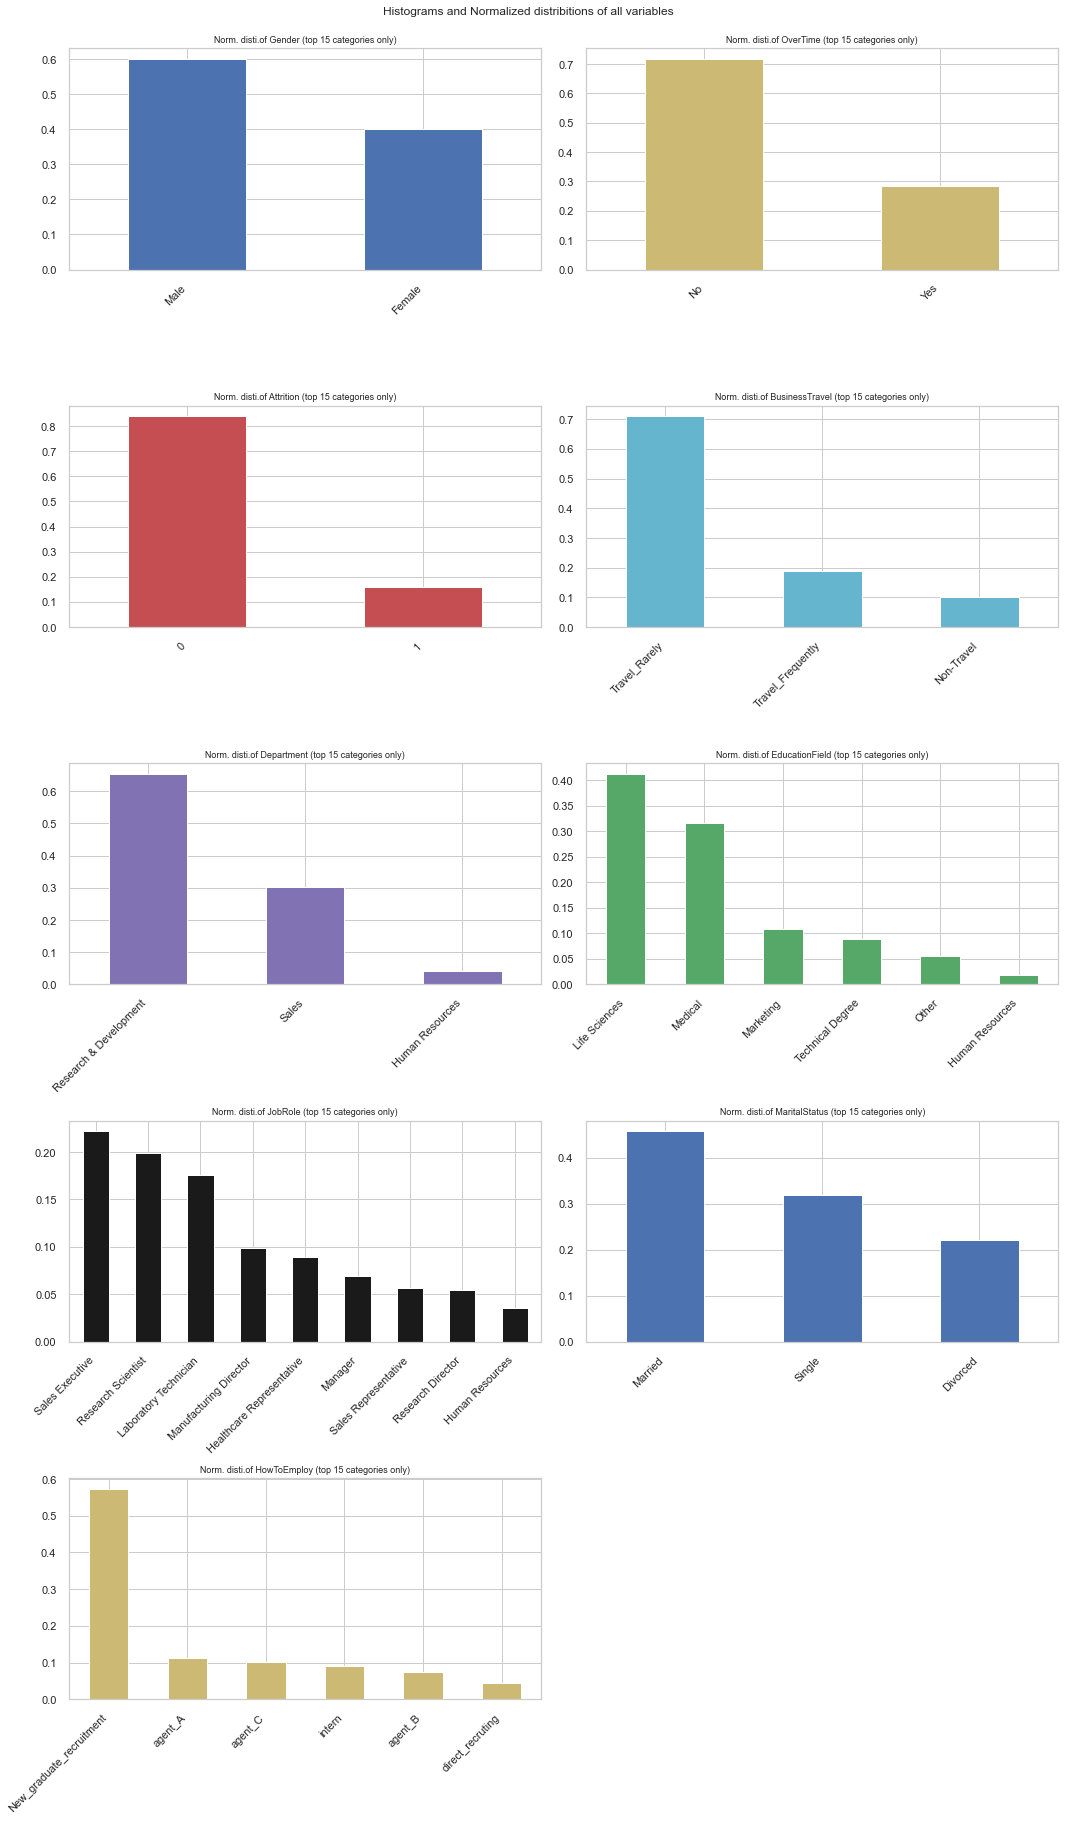

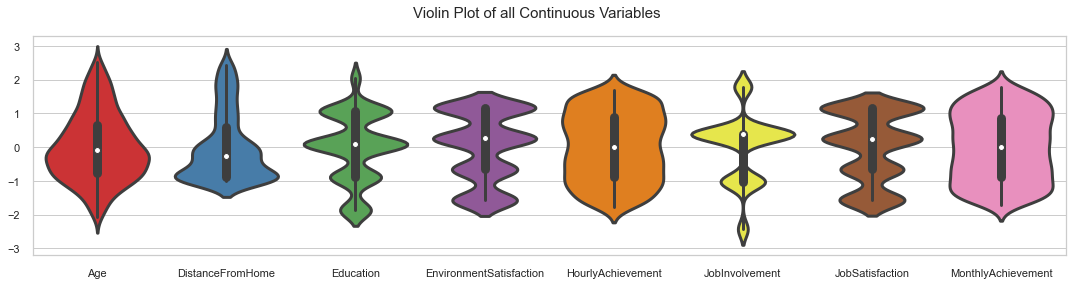

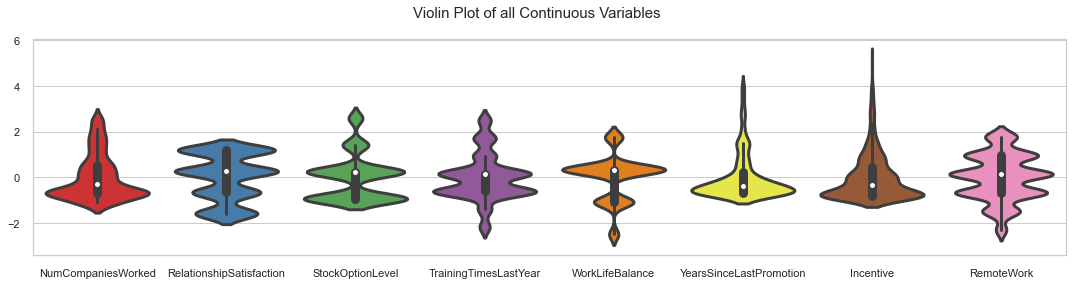

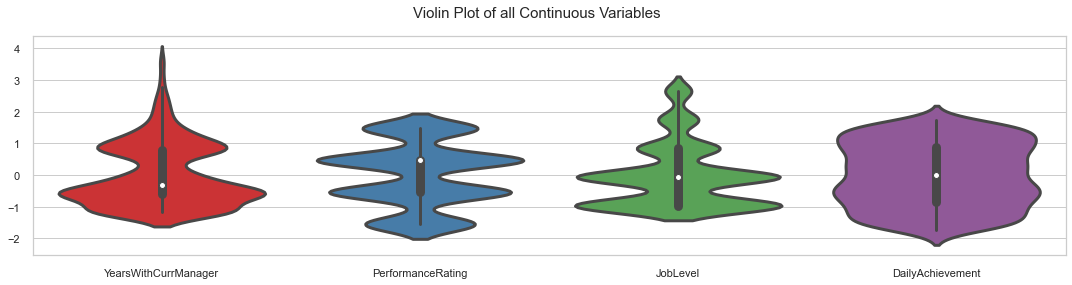

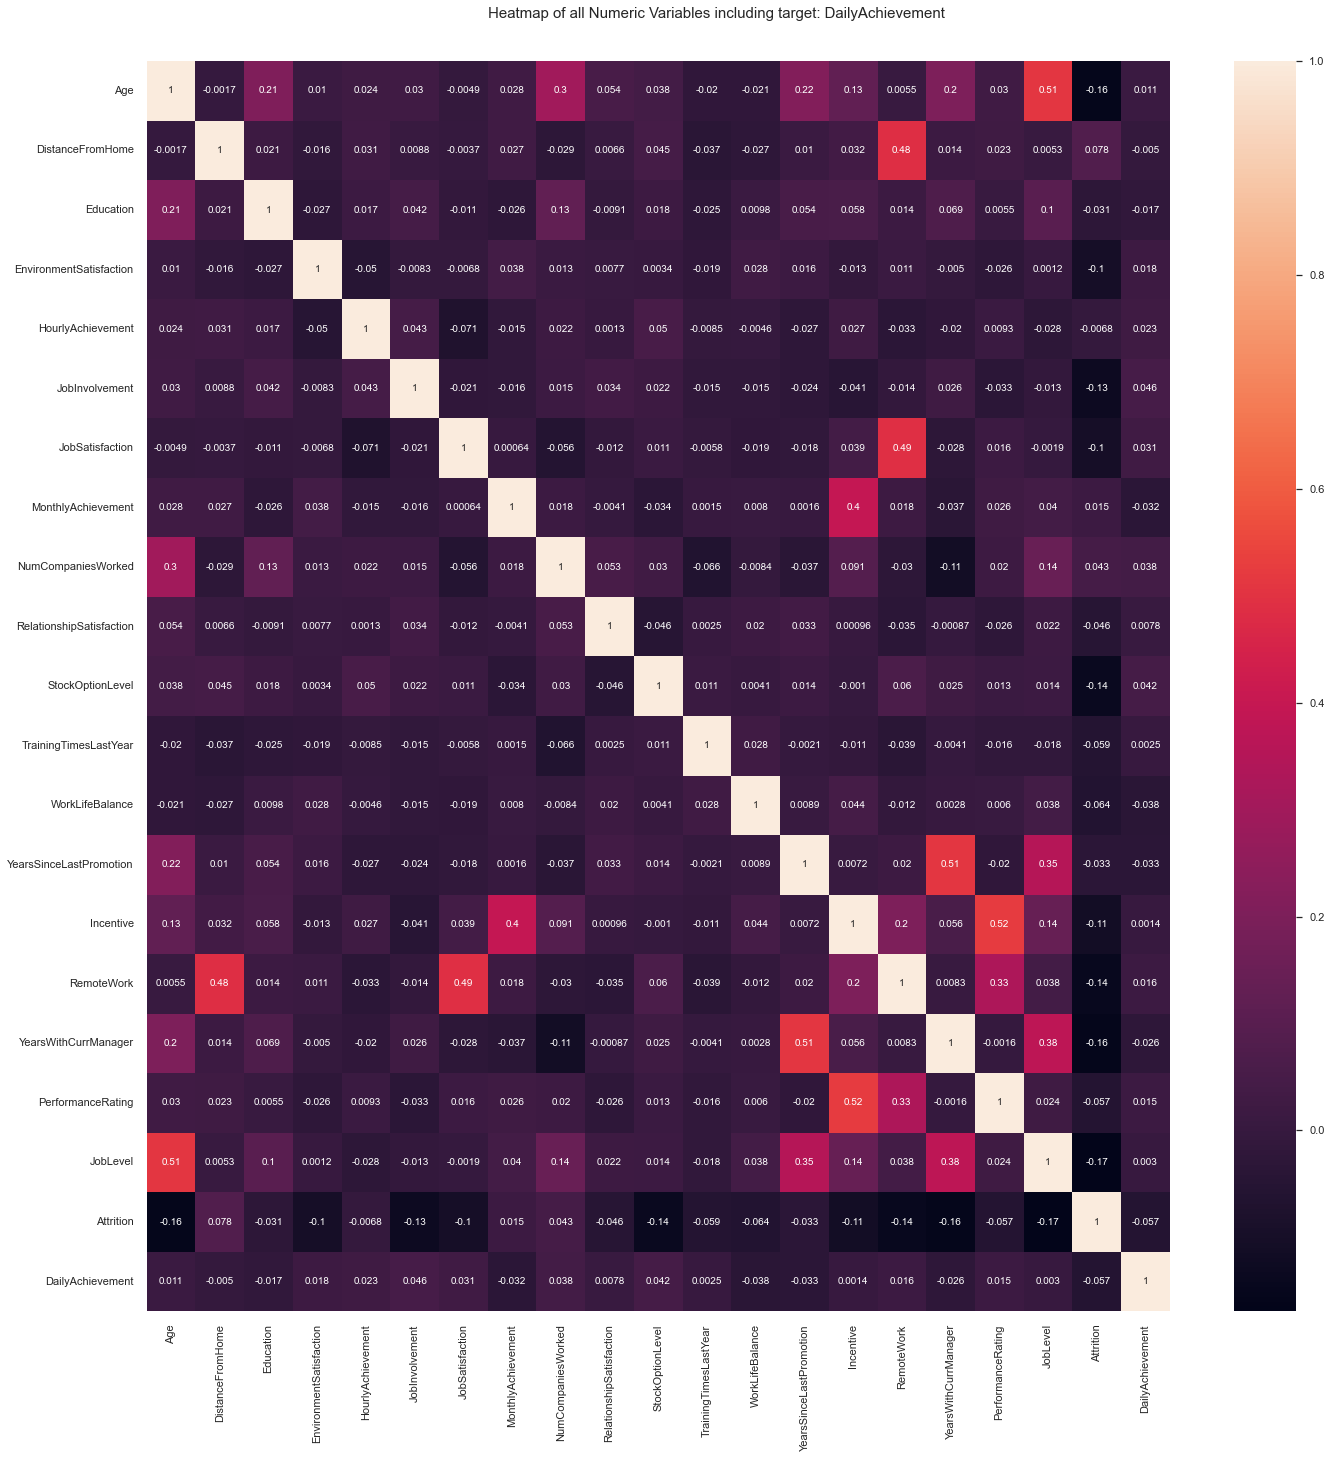

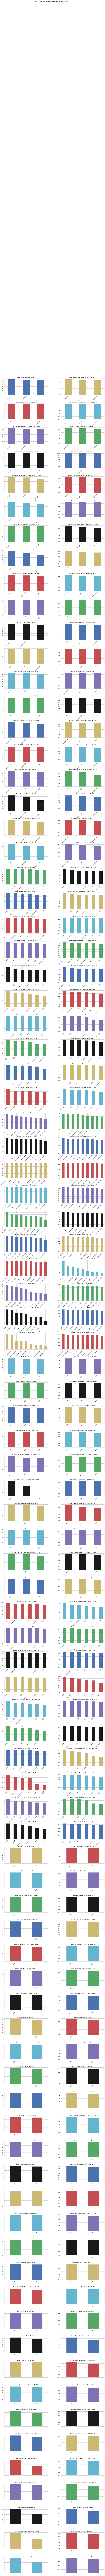

In [15]:
# %matplotlib inline
# eda(display_format="html") 

from autoviz.AutoViz_Class import AutoViz_Class
import pandas as pd
AV = AutoViz_Class()

dft = AV.AutoViz( "" ,sep=',', depVar=purpose, dfte=df, header=0, verbose=2,
lowess=False,chart_format='svg',max_rows_analyzed=1500,max_cols_analyzed=30)